# UEQ+ Data Analysis Tool

The goal of this tool is to make the analysis of UEQ+ (Modular extension of the User Experience Questionnaire) data as easy as possible for you. The UEQ+ is a set of scales that can combined to form a concrete UX questionnaire. Thus, it is possible to create a questionnaire that fits exactly to the needs of the evaluated product.

Each scale consists of 4 items that measure the impression of subject towards the UX aspect represented by the scale and a single item that measures the relevance or importance of the scale for the subject. 

This is an Python adaptation of the Excel UEQ+ Data Analysis Tool by Dr. Martin Schrepp. The original tool can be found here: 

https://ueqplus.ueq-research.org

In [1]:
from definitions import ROOT_DIR
%load_ext autoreload
%autoreload 2
import os
import sys


module_path = os.path.abspath(os.path.join(ROOT_DIR, '/src/'))
sys.path.insert(0, module_path)

# Importing the data

In [2]:
from src.ueqplusanalyze.analyzer import read_in_ueq_observed_data
ueq = {
    'quality_of_content': ["UP01_01", "UP01_02", "UP01_03", "UP01_04"],
    'trustworthiness': ["UP02_01", "UP02_02", "UP02_03", "UP02_04"],
    'clarity': ["UP04_01", "UP04_02", "UP04_03", "UP04_04"],
    'usefulness': ["UP05_01", "UP05_02", "UP05_03", "UP05_04"],
    'dependability': ["UP06_01", "UP06_02", "UP06_03", "UP06_04"],
    'importance_of_scales': ["UP01_05", "UP02_05", "UP04_05", "UP05_05", "UP06_05"]
}

path_to_data = os.path.join(ROOT_DIR, 'data/ueq_export.csv')
ueq_observed_ratings = read_in_ueq_observed_data(path_to_data)
ueq.keys()

dict_keys(['quality_of_content', 'trustworthiness', 'clarity', 'usefulness', 'dependability', 'importance_of_scales'])

# Data_Items

For each scale the UEQ+ collects ratings for 4 items and one rating for the overall importance of the scale.  
The value range goes from 1 (if the alternative on the extreme left is marked) to 7 (if the alternative on the extreme right is marked). 	

## Observed item ratings

In [3]:
from src.ueqplusanalyze.analyzer import get_observed_item_ratings

observed_item_ratings_result = get_observed_item_ratings(ueq_observed_ratings, ueq)
observed_item_ratings_result

quality_of_content                         trustworthiness                  \
              UP01_01 UP01_02 UP01_03 UP01_04         UP02_01 UP02_02 UP02_03   
0                   7       6       6       6               6       6       6   
1                   6       5       7       7               6       7       7   
2                   6       4       6       6               4       4       4   
3                   7       5       6       6               6       6       5   
4                   2       7       3       7               5       7       5   
5                   7       6       5       7               6       6       7   
6                   7       7       7       7               7       7       7   
7                   6       4       7       7               5       7       7   
8                   4       5       6       7               5       6       6   
9                   6       5       4       4               4       5       5   
10                  7       5       5       5               6       4       6   
11                  4       5       4       5               6       5       5   
12                  6       3       4       3               2       6       6   
13                  7       5       5       4               5       4       4   
14                  4       6       6       6               6       4       5   

           clarity                         usefulness                          \
   UP02_04 UP04_01 UP04_02 UP04_03 UP04_04    UP05_01 UP05_02 UP05_03 UP05_04   
0        6       7       7       7       7          6       7       7       7   
1        6       7       7       7       7          5       6       6       6   
2        4       6       6       6       6          6       6       6       4   
3        5       6       7       7       6          5       6       5       4   
4        2       6       6       6       6          7       7       7       7   
5        7       6       6       7       6          6       7       7       6   
6        7       5       5       2       6          7       7       7       7   
7        7       6       7       7       7          7       7       5       6   
8        6       6       6       6       6          6       6       6       5   
9        5       3       3       4       4          4       5       4       5   
10       4       5       4       5       3          6       6       7       6   
11       4       6       6       5       5          4       3       3       4   
12       4       7       7       7       7          2       2       4       2   
13       4       5       6       6       6          5       5       5       4   
14       4       7       7       7       7          6       6       6       5   

   dependability                          
         UP06_01 UP06_02 UP06_03 UP06_04  
0              6       7       6       7  
1              7       7       7       7  
2              5       6       5       4  
3              6       6       5       5  
4              5       7       5       7  
5              6       7       7       7  
6              2       6       4       3  
7              5       6       6       5  
8              6       6       6       5  
9              5       5       5       6  
10             4       5       6       7  
11             5       6       6       6  
12             5       6       7       6  
13             5       4       5       4  
14             7       6       7       6

## Scale means per participant

In [4]:
from src.ueqplusanalyze.analyzer import scale_means_per_participant

scale_means_per_participant_result = scale_means_per_participant(ueq_observed_ratings, ueq)
scale_means_per_participant_result

,quality_of_content,trustworthiness,clarity,usefulness,dependability
0,6.25,6.00,7.00,6.75,6.50
1,6.25,6.50,7.00,5.75,7.00
2,5.50,4.00,6.00,5.50,5.00
3,6.00,5.50,6.50,5.00,5.50
4,4.75,4.75,6.00,7.00,6.00
5,6.25,6.50,6.25,6.50,6.75
6,7.00,7.00,4.50,7.00,3.75
7,6.00,6.50,6.75,6.25,5.50
8,5.50,5.75,6.00,5.75,5.75
9,4.75,4.75,3.50,4.50,5.25


# Data_Importance

For each scale the UEQ+ collects ratings for 4 items and one rating for the overall importance of the scale.  
The value range goes from 1 (if the alternative on the extreme left is marked) to 7 (if the alternative on the extreme right is marked). 					

## Observed importance ratings

In [5]:
from src.ueqplusanalyze.analyzer import get_observed_importance_ratings

observed_importance_ratings_result = get_observed_importance_ratings(ueq_observed_ratings, ueq)
observed_importance_ratings_result

,quality_of_content,trustworthiness,clarity,usefulness,dependability
0,7,6,7,6,7
1,6,7,5,5,6
2,6,6,7,6,6
3,6,6,7,5,6
4,7,7,6,7,6
5,7,6,7,6,5
6,7,7,7,7,7
7,7,7,7,7,6
8,5,7,5,6,6
9,5,7,6,5,5


## Relative importance ratings

In [6]:
from src.ueqplusanalyze.analyzer import relative_importance_ratings

relative_importance_ratings_result = relative_importance_ratings(ueq_observed_ratings, ueq)
relative_importance_ratings_result

,quality_of_content,trustworthiness,clarity,usefulness,dependability
0,0.21,0.18,0.21,0.18,0.21
1,0.21,0.24,0.17,0.17,0.21
2,0.19,0.19,0.23,0.19,0.19
3,0.20,0.20,0.23,0.17,0.20
4,0.21,0.21,0.18,0.21,0.18
5,0.23,0.19,0.23,0.19,0.16
6,0.20,0.20,0.20,0.20,0.20
7,0.21,0.21,0.21,0.21,0.18
8,0.17,0.24,0.17,0.21,0.21
9,0.18,0.25,0.21,0.18,0.18


# Means

Here means for the scales (mean over all items in a scale), standard deviations and confidence intervalls are calculated.

The mean values are transformed from a 1 to 7 range to a -3 to +3 range to be compatible with the reporting format of the original UEQ.												

## Mean and confidence interval per scale

In [7]:
from src.ueqplusanalyze.analyzer import mean_and_confidence_intervall_per_scale

mean_and_confidence_intervall_per_scale_result = mean_and_confidence_intervall_per_scale(ueq_observed_ratings, ueq)
mean_and_confidence_intervall_per_scale_result

,mean,variance,std_dev,n,confidence,confidence_interval
quality_of_content,1.53,1.68,1.28,15,0.65,"[0.88, 2.18]"
trustworthiness,1.38,1.53,1.23,15,0.62,"[0.76, 2.0]"
clarity,1.93,1.42,1.18,15,0.60,"[1.34, 2.53]"
usefulness,1.52,1.88,1.36,15,0.69,"[0.83, 2.2]"
dependability,1.68,1.20,1.09,15,0.55,"[1.13, 2.23]"


## Mean importance ratings

In [8]:
from src.ueqplusanalyze.analyzer import mean_importance_ratings

mean_importance_ratings_result = mean_importance_ratings(ueq_observed_ratings, ueq)
mean_importance_ratings_result

,mean,variance,std_dev,n,confidence,confidence_interval
quality_of_content,1.67,1.67,1.25,15,0.63,"[1.04, 2.3]"
trustworthiness,2.00,1.14,1.03,15,0.52,"[1.48, 2.52]"
clarity,2.13,0.98,0.96,15,0.48,"[1.65, 2.62]"
usefulness,1.47,1.70,1.26,15,0.64,"[0.83, 2.1]"
dependability,1.60,1.11,1.02,15,0.52,"[1.08, 2.12]"


## Mean and confidence interval per item

In [9]:
from src.ueqplusanalyze.analyzer import mean_and_confidence_interval_per_item

mean_and_confidence_interval_per_item_result = mean_and_confidence_interval_per_item(ueq_observed_ratings, ueq)
mean_and_confidence_interval_per_item_result

mean  variance  std_dev   n  confidence  \
quality_of_content UP01_01  1.73      2.35     1.48  15        0.75   
                   UP01_02  1.20      1.17     1.05  15        0.53   
                   UP01_03  1.40      1.54     1.20  15        0.61   
                   UP01_04  1.80      1.74     1.28  15        0.65   
trustworthiness    UP02_01  1.27      1.50     1.18  15        0.60   
                   UP02_02  1.60      1.40     1.14  15        0.58   
                   UP02_03  1.67      1.10     1.01  15        0.51   
                   UP02_04  1.00      2.14     1.41  15        0.72   
clarity            UP04_01  1.87      1.12     1.02  15        0.52   
                   UP04_02  2.00      1.43     1.15  15        0.58   
                   UP04_03  1.93      2.07     1.39  15        0.70   
                   UP04_04  1.93      1.35     1.12  15        0.57   
usefulness         UP05_01  1.47      1.84     1.31  15        0.66   
                   UP05_02  1.73      2.21     1.44  15        0.73   
                   UP05_03  1.67      1.67     1.25  15        0.63   
                   UP05_04  1.20      2.03     1.38  15        0.70   
dependability      UP06_01  1.27      1.50     1.18  15        0.60   
                   UP06_02  2.00      0.71     0.82  15        0.41   
                   UP06_03  1.80      0.89     0.91  15        0.46   
                   UP06_04  1.67      1.67     1.25  15        0.63   

                           confidence_interval  
quality_of_content UP01_01        [0.98, 2.48]  
                   UP01_02        [0.67, 1.73]  
                   UP01_03        [0.79, 2.01]  
                   UP01_04        [1.15, 2.45]  
trustworthiness    UP02_01        [0.67, 1.86]  
                   UP02_02        [1.02, 2.18]  
                   UP02_03        [1.16, 2.18]  
                   UP02_04        [0.28, 1.72]  
clarity            UP04_01        [1.35, 2.38]  
                   UP04_02        [1.42, 2.58]  
                   UP04_03        [1.23, 2.64]  
                   UP04_04         [1.36, 2.5]  
usefulness         UP05_01         [0.8, 2.13]  
                   UP05_02        [1.01, 2.46]  
                   UP05_03         [1.04, 2.3]  
                   UP05_04          [0.5, 1.9]  
dependability      UP06_01        [0.67, 1.86]  
                   UP06_02        [1.59, 2.41]  
                   UP06_03        [1.34, 2.26]  
                   UP06_04         [1.04, 2.3]

# Consistency

## Scale consistency

The Alpha-Coefficient (Cronbach, 1951) is a measure for the consistency of a scale. There is no generally accepted rule how big the value of the coefficient should be. Many authors assume that a scale should show an alpha value > 0.7 to be considered as sufficiently consistent, but these suggestions are more rules-of-thumb and not based on some sound statistical facts. Thus, from an methodological standpoint such a use of a cut-off criterium is not really well-founded (see for example Schmitt, N., 1996). Especially if you have only a small sample (for example less than 50 answers) the value of the Alpha-Coefficient should be interpreted very carefully. In such cases a low Alpha can result from sampling errors and may not be an indicator for a problem with the scale.
If the value of the Alpha-Coefficient for a scale shows a massive deviation from a reasonable target value, for example 0.6 or 0.7, this can be a hint that some items of the scale are in the given context interpreted by several participants in an unexpected way. In such cases please check the single item scores and correlations between the items. This can give a hint if there is maybe a common misinterpretation of an item due to the context of the evaluation. In such cases the corresponding scale should be interpreted very carefully.

In [10]:
from src.ueqplusanalyze.analyzer import scale_consistency

scale_consistency_result = scale_consistency(ueq_observed_ratings, ueq)
scale_consistency_result

,"corr(l1,l2)","corr(l1,l3)","corr(l1,l4)","corr(l2,l3)","corr(l2,l4)","corr(l3,l4)",average_corr,cronbach_alpha
quality_of_content,-0.22,0.43,-0.20,-0.01,0.53,0.53,0.18,0.46
trustworthiness,0.13,0.30,0.36,0.69,0.45,0.75,0.45,0.76
clarity,0.90,0.70,0.75,0.75,0.87,0.55,0.75,0.92
usefulness,0.92,0.75,0.80,0.81,0.84,0.74,0.81,0.94
dependability,0.35,0.67,0.51,0.36,0.46,0.65,0.50,0.80


# KPI

## Calculation of a KPI


For each scale the UEQ+ collects ratings for 4 items and one rating for the overall importance of the scale. These values are used to calculate a KPI that should represent the overall UX impression of the product. 
For the calculation the relative importance of the scale and the scale mean per participant are calculated. The KPI is then simply the mean over all participants.					

In [11]:
from src.ueqplusanalyze.analyzer import calculation_of_a_kpi

calculation_of_a_kpi_result, kpi_average, std_dev = calculation_of_a_kpi(ueq_observed_ratings, ueq)
print('Average KPI: ', kpi_average)
print('Standard Deviation: ', std_dev)
calculation_of_a_kpi_result

Average KPI:  1.65
Standard Deviation:  0.6


,quality_of_content,trustworthiness,clarity,usefulness,dependability,kpi
0,1.33,1.09,1.48,1.23,1.38,2.51
1,1.29,1.57,1.21,0.99,1.45,2.51
2,1.06,0.77,1.35,1.06,0.97,1.23
3,1.20,1.10,1.52,0.83,1.10,1.75
4,1.01,1.01,1.09,1.48,1.09,1.68
5,1.41,1.26,1.41,1.26,1.09,2.43
6,1.40,1.40,0.90,1.40,0.75,1.85
7,1.24,1.34,1.39,1.29,0.97,2.22
8,0.95,1.39,1.03,1.19,1.19,1.75
9,0.85,1.19,0.75,0.80,0.94,0.53


# Graphics

## Scale means

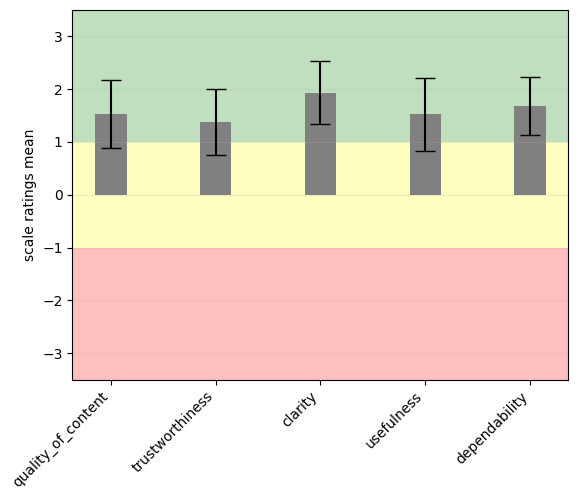

In [12]:
from src.ueqplusanalyze.analyzer import plot_scale_means

mean_and_confidence_intervall_per_scale_result = mean_and_confidence_intervall_per_scale(ueq_observed_ratings, ueq)
plot_scale_means(mean_and_confidence_intervall_per_scale_result)

## Importance ratings

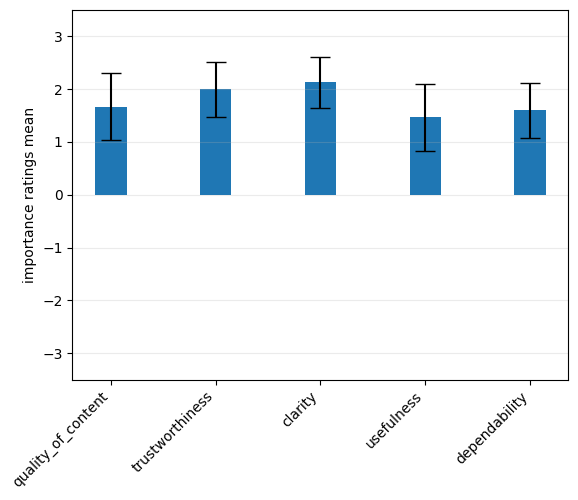

In [13]:
from src.ueqplusanalyze.analyzer import plot_scale_importance_ratings

mean_importance_ratings_result = mean_importance_ratings(ueq_observed_ratings, ueq)
plot_scale_importance_ratings(mean_importance_ratings_result)